In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [6]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
df['User ID'].nunique()

400

In [11]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

<Axes: xlabel='Purchased', ylabel='count'>

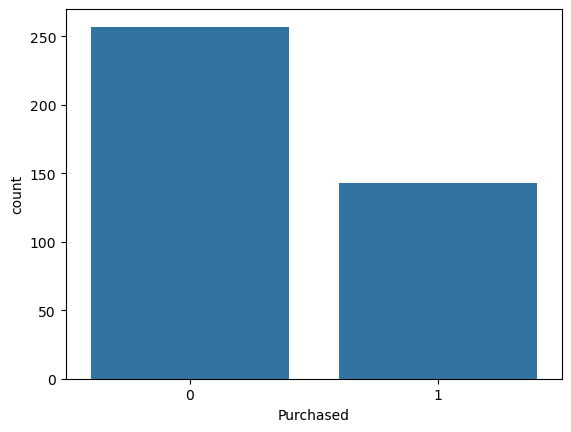

In [16]:
sns.countplot(x=df['Purchased'])

In [18]:
df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

# Label Encoding on gender column

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder=LabelEncoder()

In [21]:
df['Gender']=encoder.fit_transform(df['Gender'])

In [22]:
df['Gender'].value_counts()

Gender
0    204
1    196
Name: count, dtype: int64

# Model Training

In [34]:
x=df.iloc[:,1:4]
y=df.iloc[:,4:]

In [36]:
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [37]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)

In [45]:
x_train

,Gender,Age,EstimatedSalary
5,1,27,58000
313,0,49,141000
224,0,35,60000
209,0,46,22000
394,0,39,59000
...,...,...,...
50,0,24,32000
153,0,36,50000
296,1,42,73000
352,0,42,90000


In [46]:
y_train

,Purchased
5,0
313,1
224,0
209,0
394,0
...,...
50,0
153,0
296,1
352,1


In [47]:
x_test

,Gender,Age,EstimatedSalary
379,0,58,23000
103,0,33,149000
301,1,48,74000
75,1,34,112000
123,1,35,53000
...,...,...,...
342,0,38,65000
160,1,32,100000
68,0,22,63000
281,1,35,61000


In [48]:
y_test

,Purchased
379,1
103,1
301,1
75,1
123,0
...,...
342,0
160,1
68,0
281,0


In [49]:
model=LogisticRegression()

In [50]:
model.fit(x_train,y_train)

C:\Users\SHUBHAM MURTADAK\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [51]:
y_pred=model.predict(x_test)

In [52]:
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [53]:
y_test[0:5]

,Purchased
379,1
103,1
301,1
75,1
123,0


In [54]:
#Training Accuracy
model.score(x_train,y_train)

0.64375

In [55]:
model.score(x_test,y_test)

0.6375

In [56]:
#plotting confusion matrix

In [69]:
ConfusionMatrixDisplay(model)

In [70]:
y_pred=model.predict(x_train)

In [71]:
cnf_matrix=confusion_matrix(y_train,y_pred)

In [72]:
print(cnf_matrix)

[[206   0]
 [114   0]]


In [73]:
accuracy_score(y_train,y_pred)

0.64375

In [75]:
clf_report=classification_report(y_train,y_pred)

C:\Users\SHUBHAM MURTADAK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SHUBHAM MURTADAK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SHUBHAM MURTADAK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       206
           1       0.00      0.00      0.00       114

    accuracy                           0.64       320
   macro avg       0.32      0.50      0.39       320
weighted avg       0.41      0.64      0.50       320



In [79]:
# Extract TP, FP, TN, FN from confusion matrix
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]
TP = cnf_matrix[1, 1]

In [82]:
print("TN:->",TN)
print("FP:->",FP)
print("FN:->",FN)
print("TP:->",TP)

TN:-> 206
FP:-> 0
FN:-> 114
TP:-> 0


In [83]:
y_pred=model.predict(x_test)

In [84]:
accuracy=accuracy_score(y_test,y_pred)
error_rate=1-accuracy
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)


C:\Users\SHUBHAM MURTADAK\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SyntaxError: unterminated string literal (detected at line 1) (1738283535.py, line 1)

In [86]:
# Print the computed metrics
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6375
Error Rate: 0.36250000000000004
Precision: 0.0
Recall: 0.0


# END